<a href="https://colab.research.google.com/github/YaosuLee/ML-Study-Guide/blob/main/simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision


In [5]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [6]:
import random

random.seed(42)
torch.manual_seed(42)

model = Model()

Load Data and Train Neural Network Model - Deep Learning with PyTorch 6

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [11]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)

In [15]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# X is a bunch of features, and axis=1 for column
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [18]:
X = X.values
y = y.values

In [21]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Convert to tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
#Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
#Choose the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [29]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print('epoch {}, loss {}'.format(i, loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 0, loss 0.06449069827795029
epoch 10, loss 0.061621952801942825
epoch 20, loss 0.05980578809976578
epoch 30, loss 0.058525584638118744
epoch 40, loss 0.057549696415662766
epoch 50, loss 0.056762780994176865
epoch 60, loss 0.05610177293419838
epoch 70, loss 0.055529866367578506
epoch 80, loss 0.05502278357744217
epoch 90, loss 0.054564688354730606


Text(0.5, 0, 'Epoch')

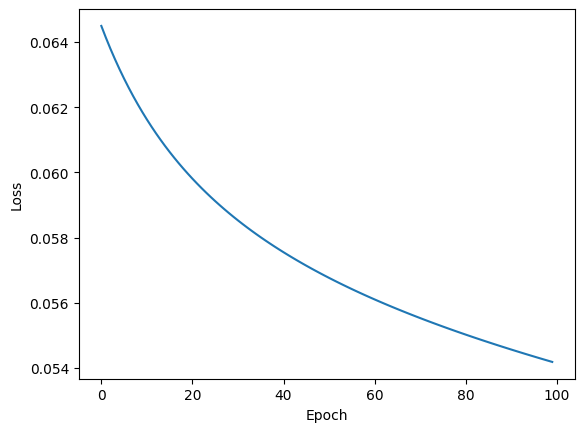

In [30]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

Evaluate Test Data Set On Network - Deep Learning with PyTorch 7

In [31]:
with torch.no_grad(): #Basically turn off back propogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


In [34]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'prediction: {y_val.argmax().item()}, truth: {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'accuracy: {correct/len(X_test)}')

prediction: 1, truth: 1
prediction: 0, truth: 0
prediction: 2, truth: 2
prediction: 1, truth: 1
prediction: 1, truth: 1
prediction: 0, truth: 0
prediction: 1, truth: 1
prediction: 2, truth: 2
prediction: 1, truth: 1
prediction: 1, truth: 1
prediction: 2, truth: 2
prediction: 0, truth: 0
prediction: 0, truth: 0
prediction: 0, truth: 0
prediction: 0, truth: 0
prediction: 1, truth: 1
prediction: 2, truth: 2
prediction: 1, truth: 1
prediction: 1, truth: 1
prediction: 2, truth: 2
prediction: 0, truth: 0
prediction: 2, truth: 2
prediction: 0, truth: 0
prediction: 2, truth: 2
prediction: 2, truth: 2
prediction: 2, truth: 2
prediction: 2, truth: 2
prediction: 2, truth: 2
prediction: 0, truth: 0
prediction: 0, truth: 0
accuracy: 1.0


Save and Load our Neural Network Model - Deep Learning with PyTorch 9

In [35]:
#Save our model
torch.save(model.state_dict(), 'model.pt')


In [36]:
new_model = Model()
new_model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [37]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

Convolutional Neural Network Intro - Deep Learning with PyTorch 10